<a href="https://colab.research.google.com/github/brendanpshea/database_sql/blob/main/Database_09_Monsters_of_JSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monsters of JSON and XML
### Brendan Shea, PhD
In the ever-evolving digital world, data has become the lifeblood of modern technology. Every day, countless amounts of data are generated, processed, and exchanged across various systems and platforms. This data can come in a multitude of formats, and one of the most prevalent is JSON, short for JavaScript Object Notation.

**JSON** is a lightweight data-interchange format that is easy for humans to read and write and easy for machines to parse and generate. It is based on a subset of the JavaScript Programming Language. However, JSON is a text format that is completely language independent but uses conventions that are familiar to programmers of the C-family of languages, including C, C++, C#, Java, JavaScript, Perl, Python, and many others.

This chapter aims to provide a comprehensive introduction to JSON, its structure, and its practical uses in the contexts of databses. We will delve into the essential details of JSON and how it fits into the broader landscape of data formats. We will also explore why JSON has gained such popularity in the realm of databases and data exchange.

One such database that has embraced JSON is PostgreSQL. Known for its robustness and advanced capabilities, PostgreSQL offers substantial support for JSON, allowing developers to store, query, and manipulate JSON data efficiently. We will explore these features and provide a hands-on guide to interacting with JSON within the PostgreSQL environment.

To bring these concepts to life, we will be using a case study throughout this chapter. We will work with a JSON dataset related to the world of Dungeons and Dragons (D&D), a popular fantasy role-playing game. This dataset contains detailed information about various monsters in the game, encoded in JSON format. This dataset not only serves as a practical example of real-world JSON data but (hopefully!) also adds an element of fun and intrigue to our exploration of JSON.

By the end of this chapter, you should have a solid understanding of JSON, its importance, and how to work with it in PostgreSQL. So, prepare yourself for a journey into the realm of data, where monsters lurk in JSON format, and PostgreSQL is our tool of choice for taming them.

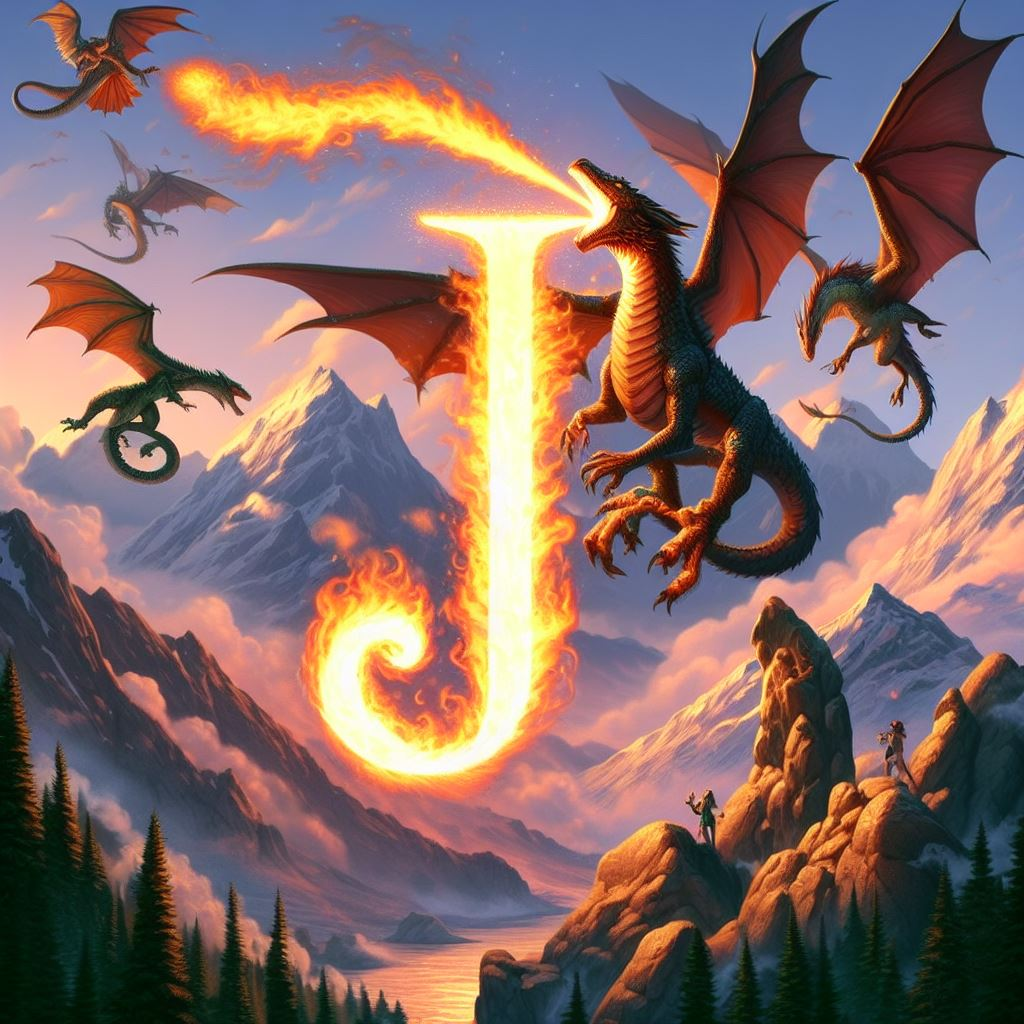

## Brendan's Lecture
To come on Tuesday.

## What is JSON?

JSON, or JavaScript Object Notation, is a text-based data format that is designed to be human-readable and easy for computers to parse and generate. JSON originated from the JavaScript language, but it is a language-independent data format. It is often used for transmitting data in web applications, serving as an alternative to XML.

JSON is built on two simple structures: **objects** and **arrays**.

### Objects
An **object** in JSON is an unordered set of **key-value pairs**, similar to a dictionary, a hash, or a record in other languages. Objects are enclosed in curly braces {}. A colon : separates the **keys** and the **values**, and a comma `,` separates the pairs. For example:

```javascript
{
  "monsterName": "Fluffy Bunny",
  "monsterType": "Beast",
  "hitPoints": 3,
  "abilities": ["Hop", "Nibble", "Cuteness Overload"]
}
```
In this example, the object describes a somewhat unusual D&D monster, a "Fluffy Bunny" with abilities including "Hop", "Nibble", and "Cuteness Overload".

### Arrays
An **array** in JSON is an ordered list of values, similar to a list, a vector, or an array in other languages. Arrays are enclosed in square brackets [], and the values are separated by commas. For example:

```javascript
[
  "Bumbling Beholder",
  "Kind Kobold",
  "Dancing Doppelganger",
  "Jolly Jelly Cube"
]
```
In this example, the array includes a list of whimsical D&D monster names. The order of these monster names in the array can be important, depending on how the data is to be used.

## Why JSON is not Relational
Relational databases and JSON structures have fundamentally different ways of representing and organizing data.

In a relational database, data is structured into tables, similar to a spreadsheet. Each table has a defined **schema**, which is a set of attributes (or columns), and each attribute has a specific **data type**. Each row in the table represents a single record, and each cell in the row represents a value for the corresponding attribute. Relationships can be defined between tables using primary and foreign keys, allowing for complex data models to be represented.

In contrast, JSON data is represented as a collection of key-value pairs (objects) or ordered lists of values (arrays). JSON objects do not have a predefined schema, meaning each object can have a different set of keys. Arrays and objects can be nested within each other, allowing for complex, hierarchical data structures.

The differences between these two data structures have several implications:

1.  *Flexibility:* JSON is schema-less, meaning it can represent a wider variety of data structures compared to relational databases. It's easy to add new fields or nest data structures. However, this flexibility can lead to inconsistencies in data if not managed carefully.

2.  *Complexity of Relationships:* Relational databases excel at representing complex relationships between different entities (tables). In JSON, while it's possible to nest objects within each other to represent relationships, it's less straightforward to manage many-to-many or complex relationships.

3.  *Data Integrity:* Relational databases provide strong data integrity through constraints, such as unique, primary key, and foreign key constraints. JSON does not inherently support these constraints, so data integrity must be managed at the application level.

4.  *Querying:* Relational databases have a powerful querying language (SQL) that supports complex queries, aggregations, and joins. Querying JSON data can be less straightforward and often requires parsing the JSON structure at the application level. However, some databases like PostgreSQL offer JSON functions and operators that make querying JSON data easier.

5.  *Storage and Performance:* Generally, relational databases are optimized for performance and can handle large volumes of data efficiently. JSON can be less efficient for large data volumes, especially when the JSON structures are complex and deeply nested. However, some modern databases have improved JSON storage and query performance.

In the context of our D&D example, if we were to use a relational database, we might have separate tables for "Monsters", "Abilities", and "Types", and we would define relationships between these tables. With JSON, we could potentially store all this data in a single JSON object, with abilities and types nested within each monster. The best approach would depend on the specific requirements and complexity of our application.

## Why is JSON Used?
JSON, or JavaScript Object Notation, has found extensive usage in modern software development due to its lightweight nature and easy readability. Here are some of the practical uses of JSON:

1.  *Data Storage:* JSON is often used for storing data locally or remotely in a structured, human-readable format. For example, a web application might store user settings in JSON format for easy retrieval and update.

2.  *Data Exchange:* JSON is commonly used as the data format for sending data between a server and a web application, or between different parts of a web application. Its human-readable nature and wide support across different programming languages make it ideal for this purpose.

3.  *Configuration Files:* JSON is often used to store configuration settings for web applications, desktop applications, servers, and more. These configuration files can be easily read and written by the application, and also easily understood and modified by humans.

4.  *Web APIs:* Most modern web APIs (Application Programming Interfaces) use JSON as their communication format. When a web application makes a request to an API (for example, to fetch data), the API often sends back the response in JSON format, which the web application can then easily parse and use.

5.  *Database Operations:* Many NoSQL databases designed to store **semi-structured data**, like MongoDB, use JSON for storing and manipulating data. Even SQL databases, like PostgreSQL, now often include support for JSON data types, allowing for more flexible data models.

6.  *Frontend Frameworks:* Many modern frontend frameworks (like React and Vue.js) use JSON for handling data within the application.

In the context of our Dungeons & Dragons example, a D&D game application might use JSON to store data about different monsters, characters, and game settings. The game might also fetch additional data from a D&D API, which sends back responses in JSON format. This JSON data can then be parsed and used by the application to enhance the gameplay experience.

## Graphic: When to Use JSON columns
mermaid-diagram-2023-10-27-110658.svg

## Example: Working With DnD Monsters
For the remainder of this chapter, we'll be working with the JSON file `srd_5e_monsters.json` contains data about 327 different monsters from the Dungeons and Dragons universe. Each monster is represented as a JSON object with several attributes. (https://github.com/brendanpshea/database_sql/blob/main/data/srd_5e_monsters.json)

Here are the keys (attributes) for the first monster in the data:

-   `name`: The name of the monster.
-   `meta`: Metadata about the monster, such as its size and alignment.
-   `Armor Class`: The monster's armor class.
-   `Hit Points`: The monster's hit points.
-   `Speed`: The monster's speed.
-   `STR`, `STR_mod`, `DEX`, `DEX_mod`, `CON`, `CON_mod`, `INT`, `INT_mod`, `WIS`, `WIS_mod`, `CHA`, `CHA_mod`: These are the monster's ability scores and their modifiers.
-   `Saving Throws`: The monster's saving throws.
-   `Skills`: An array (list) of the monster's skills.
-   `Senses`: An array (list) of the monster's senses.
-   `Languages`: An array (list) of the languages the monster can speak.
-   `Challenge`: The challenge rating of the monster.
-   `XP`: The amount of experience points  the monster is worth.
-   `Traits`: Traits that the monster possesses.
-   `Actions`: Actions that the monster can take.
-   `Legendary Actions`: Legendary actions that the monster can take.
-   `img_url`: A URL to an image of the monster.

The JSON data is structured as an array of such objects. Each object represents a unique monster, and the keys within each object provide detailed information about that particular monster.

The next step, having understood the structure, would be to import this JSON data into a PostgreSQL database.

## Importing JSON data into SQL
Here's a script for importing JSON data into a PostgreSQL database. You don't need to worry about the details here.

In [1]:
!apt install postgresql postgresql-contrib &>log
!service postgresql start
!sudo -u postgres psql -c "CREATE USER root WITH SUPERUSER"
# set connection
%load_ext sql
%sql postgresql+psycopg2://@/postgres

 * Starting PostgreSQL 14 database server
   ...done.
CREATE ROLE


In [2]:
# download the file
!wget https://github.com/brendanpshea/database_sql/raw/main/data/processed_srd_5e_monsters.json -q

In [3]:
%%capture
import json

# Load JSON file
with open('processed_srd_5e_monsters.json', 'r') as f:
    data = json.load(f)

# Use SQL magic to connect to PostgreSQL
%sql postgresql+psycopg2://@/postgres

# Create table
%sql DROP TABLE IF EXISTS monsters;
%sql CREATE TABLE monsters (data JSONB);

# Insert JSON data into the table
for monster in data:
    monster_json = json.dumps(monster)
    %sql INSERT INTO monsters (data) VALUES (:monster_json)


## Previewing the Data
Now that we have the data loaded into our database, let's take a look it. First, we can count the monsters.

In [4]:
## Make sure we have got all the monsters!
%sql SELECT COUNT(*) FROM monsters;

 * postgresql+psycopg2://@/postgres
1 rows affected.


count
327


Now, let's take a look at the "head" of the data. You'll see a few new operations here:

-   `SUBSTRING`: A function in PostgreSQL that extracts a substring from a string. It takes the string to be cut as its first argument.

-   `data::text`: This is a type cast operation. The double colon (`::`) is a PostgreSQL-specific syntax for casting a value to a different data type. In this case, `data` is a JSON data type, and `::text` converts its values to `text` type so that the `SUBSTRING` function can operate on it, as `SUBSTRING` requires a text input.

-   `FROM 1 FOR 200`: These are parameters for the `SUBSTRING` function, specifying the portion of the string to extract. `FROM 1` indicates that the substring should start from the first character, and `FOR 200` means the substring should be 200 characters long. If the string is shorter than 200 characters, the entire string will be returned.

In [ ]:
%%sql
SELECT SUBSTRING(data::text FROM 1 FOR 200) FROM monsters limit 5;

 * postgresql+psycopg2://@/postgres
5 rows affected.


substring
"{""XP"": 5, ""CHA"": ""18"", ""CON"": ""15"", ""DEX"": ""9"", ""INT"": ""18"", ""STR"": ""21"", ""WIS"": ""15"", ""meta"": ""Large aberration, lawful evil"", ""name"": ""Aboleth"", ""Speed"": [""10 ft."", ""swim 40 ft.""], ""Senses"": [""Darkv"
"{""XP"": 50, ""CHA"": ""11"", ""CON"": ""10"", ""DEX"": ""10"", ""INT"": ""10"", ""STR"": ""10"", ""WIS"": ""14"", ""meta"": ""Medium humanoid, any"", ""name"": ""Acolyte"", ""Speed"": [""30 ft.""], ""Senses"": [""Passive Perception 12""], ""S"
"{""XP"": 11, ""CHA"": ""17"", ""CON"": ""21"", ""DEX"": ""14"", ""INT"": ""14"", ""STR"": ""23"", ""WIS"": ""13"", ""meta"": ""Huge dragon, chaotic evil"", ""name"": ""Adult Black Dragon"", ""Speed"": [""40 ft."", ""fly 80 ft."", ""swim 40 f"
"{""XP"": 15, ""CHA"": ""19"", ""CON"": ""23"", ""DEX"": ""10"", ""INT"": ""16"", ""STR"": ""25"", ""WIS"": ""15"", ""meta"": ""Huge dragon, lawful evil"", ""name"": ""Adult Blue Dragon"", ""Speed"": [""40 ft."", ""burrow 30 ft."", ""fly 80 f"
"{""XP"": 10, ""CHA"": ""17"", ""CON"": ""21"", ""DEX"": ""10"", ""INT"": ""14"", ""STR"": ""23"", ""WIS"": ""13"", ""meta"": ""Huge dragon, chaotic good"", ""name"": ""Adult Brass Dragon"", ""Speed"": [""40 ft."", ""burrow 30 ft."", ""fly 80"


Each row in this database represets the JSON data of a single monster. Now, let's "pretty print" the entire first row of our database, so that we can see what this looks like.  (Here, I've used the Python programming language, so don't worry about the details).

In [6]:
## Let's print the first monster

# First, the actual query
result_set = %sql SELECT * FROM monsters LIMIT 1;

# Now, we're going to "pretty print" it
result_dict = result_set[0][0]
pretty_json = json.dumps(result_dict, indent=4)
print(pretty_json)


 * postgresql+psycopg2://@/postgres
1 rows affected.
{
    "XP": 5,
    "CHA": "18",
    "CON": "15",
    "DEX": "9",
    "INT": "18",
    "STR": "21",
    "WIS": "15",
    "meta": "Large aberration, lawful evil",
    "name": "Aboleth",
    "Speed": [
        "10 ft.",
        "swim 40 ft."
    ],
    "Senses": [
        "Darkvision 120 ft.",
        "Passive Perception 20"
    ],
    "Skills": [
        "History +12",
        "Perception +10"
    ],
    "Traits": "<p><em><strong>Amphibious.</strong></em> The aboleth can breathe air and water. </p><p><em><strong>Mucous Cloud.</strong></em> While underwater, the aboleth is surrounded by transformative mucus. A creature that touches the aboleth or that hits it with a melee attack while within 5 feet of it must make a DC 14 Constitution saving throw. On a failure, the creature is diseased for 1d4 hours. The diseased creature can breathe only underwater. </p><p><em><strong>Probing Telepathy.</strong></em> If a creature communicates telepat

## How to Query JSON Data Using Postgres
First, it's important to understand how we've stored our JSON data in PostgreSQL. We've created a table named `monsters`, which has a single column named `data` of type `JSONB`. Each row in this table contains a JSON object, which represents a single monster.

Now, when it comes to querying JSON data in PostgreSQL, we can use the `->`, `->>`, and `#>` operators.


-   `->`: This operator is used to get a JSON object field by key. The result is a JSON object or array. For example, `data->'name'` would give us the name of the monster as a JSON object (as an "element of a JSON array" or "value of the name field).

So, for example, let's suppose I have the JSON document

```javascript
{ "name": "Groot",
"Skills": ["Hulk Smash", "I am Groot"] }
```

```
JSON path expression: `data->'name'`
Result: "Groot"
```
I can also use this `->` operator to access array items by number (starting at 0). For example

```
JSON path expression: `data->'Skills'->0`
Result: "Hulk Smash"
```

-   `->>`: This operator is also used to get a JSON object field by key, but the result is text. For example, `data->>'name'` would give us the name of the monster as text.

-   `#>`: This operator is used to get a JSON object field by a path. A path is an array of key strings. This is useful when our JSON objects have nested objects or arrays.


Let's go through a few simple examples:

In [9]:
%%sql
--Get the names of the first five monsters
SELECT data->>'name' AS Monster_Name
FROM monsters
ORDER BY Monster_Name DESC
LIMIT 8

 * postgresql+psycopg2://@/postgres
8 rows affected.


monster_name
Zombie
Young White Dragon
Young Silver Dragon
Young Red Dragon
Young Green Dragon
Young Gold Dragon
Young Copper Dragon
Young Bronze Dragon


Here's what this query does:

-   `SELECT`: This keyword is used to select data from a database. The data returned is stored in a result table, called the result-set.

-   `data->>'name'`: Here, we're using the `->>` operator to get the `name` field from our `data` JSON objects. The result will be the name of the monster, as text.

-   `AS Monster_Name`: The `AS` keyword is used to rename a column or table with an alias. Here, we're renaming our `data->>'name'` column to `Monster_Name`.

-   `FROM monsters`: This specifies the name of the table that we're selecting data from. In this case, it's our `monsters` table.

-   `LIMIT 5`: This is used to limit the number of rows returned in a result set. Here, we're limiting our result set to the first 5 rows.

The result of this query should be the names of the first 5 monsters in our table.

## Retrieving Nested Data
Now that we've learned how to retrieve a specific attribute from our JSON data (in this case, the monster's name), let's explore more ways to interact with our JSONB column in PostgreSQL.

In our `monsters` table, each monster object has several skills. Some of these attributes could be objects or arrays themselves. For instance, if a monster has an attribute `Skills` that is an array of abilities, we can use the `->` operator to access this array. Let's consider an example where we want to access the first ability of each monster:

In [12]:
%%sql
SELECT data->'name' AS Name,
  data->'Skills'->3  AS First_Ability
FROM monsters
LIMIT 20;

 * postgresql+psycopg2://@/postgres
20 rows affected.


name,first_ability
Aboleth,None
Acolyte,None
Adult Black Dragon,None
Adult Blue Dragon,None
Adult Brass Dragon,Stealth +5
Adult Bronze Dragon,None
Adult Copper Dragon,None
Adult Gold Dragon,Stealth +8
Ape,None
Adult Green Dragon,Persuasion +8


As you can see, The `SELECT` statement in this query is selecting two columns from the monsters table:

- `Name:` The name of the monster.
- `First_Ability:` The first ability of the monster.
The `data->'name'` part of the SELECT statement is a JSON path expression. JSON path expressions are used to select data from JSON documents. In this case, the JSON path expression is selecting the name property from the data object.

The `data->'Skills'->0` part of the SELECT statement is another JSON path expression. This JSON path expression is selecting the first element of the Skills array.

## Filtering Data

We can also use these operators in the `WHERE` clause to filter our data. For example, if we want to get all monsters with a hit points greater than 300:

Here, `(data->>'Hit Points')::int > 300` is used in the `WHERE` clause to filter our data. We're casting the hit points to an integer using `::int` because the `->>` operator returns text, but we need to perform a numerical comparison.

In [26]:
%%sql
SELECT data->>'name' AS Monster_Name,
  data->>'Hit Points' AS Hit_Points
FROM monsters
WHERE (data->>'Hit Points')::int > 300
ORDER BY Hit_Points DESC;


 * postgresql+psycopg2://@/postgres
12 rows affected.


monster_name,hit_points
Tarrasque,676
Ancient Red Dragon,546
Ancient Gold Dragon,546
Ancient Silver Dragon,487
Ancient Blue Dragon,481
Kraken,472
Ancient Bronze Dragon,444
Ancient Green Dragon,385
Ancient Black Dragon,367
Ancient Copper Dragon,350


Some important operations of this query include:
-   `data->>'name'`: Fetches the value associated with the key `'name'` from the JSON column `data`. The `->>` operator gets the JSON object field as text.

-   `AS Monster_Name`: Renames the output column of `data->>'name'` to `Monster_Name`.

-   `data->>'Hit Points'`: Similarly, this fetches the value associated with the key `'Hit Points'` from the JSON column `data`, also as text.

-   `AS Hit_Points`: Renames the output column of `data->>'Hit Points'` to `Hit_Points`.

-   `WHERE (data->>'Hit Points')::int > 300`: Filters rows, returning only those where the value of `'Hit Points'` (as text) cast to an integer (`::int`) is greater than 300.

-   `ORDER BY Hit_Points DESC`: Sorts the resulting rows by `Hit_Points` in descending order (`DESC`), meaning higher hit points appear first.

The query effectively selects monster names and their hit points from a JSON column when their hit points exceed 300, sorting them from highest to lowest hit points.

## Aggregating Data

We can perform aggregation operations like COUNT, MAX, MIN, AVG, etc., on the data. For instance, if we want to find the average hit points of all monsters:

In [17]:
%%sql
SELECT AVG((data->>'Hit Points')::int) AS AVG_HP,
  MAX((data->>'Hit Points')::int) AS Max_HP,
  MIN((data->>'Hit Points')::int) AS Min_HP
FROM monsters;

 * postgresql+psycopg2://@/postgres
1 rows affected.


avg_hp,max_hp,min_hp
81.3425076452599388,676,1


In this query, we're using the AVG function to find the average of the hit points.

Remember, the keys we use to access the data (`name`, `Skills`, `Hit Points`, etc.) are dependent on the structure of the JSON objects in your monsters table. Always make sure to understand the structure of your JSON data before attempting to query it.

Take some time to try out these queries, and see what kind of data you can extract from the monsters table. As you get more comfortable with these operators and JSON data in general, you'll find that you can perform very powerful and flexible queries with PostgreSQL and JSONB.

### The `@>` Operator

The `@>` operator is known as the "contains" operator in PostgreSQL. It checks if the left-hand JSON value contains the right-hand JSON value. This operator is particularly useful when dealing with JSON arrays.

For example, suppose we have a JSON object representing a monster and we want to check if "Draconic" is in the monster's list of languages. We could do so with the following query:

In [20]:
%%sql
SELECT data->'name' AS Monster_Name,
  data->'Languages' AS Languages
FROM monsters
WHERE data->'Languages' @> '["Elvish"]'
LIMIT 10;


 * postgresql+psycopg2://@/postgres
10 rows affected.


monster_name,languages
Banshee,"['Common', 'Elvish']"
Centaur,"['Elvish', 'Sylvan']"
Drider,"['Elvish', 'Undercommon']"
Drow,"['Elvish', 'Undercommon']"
Dryad,"['Elvish', 'Sylvan']"
Giant Elk,"['Elvish', ""Giant Elk and Sylvan but can't speak them""]"
Giant Owl,"['Elvish', ""Giant Owl and Sylvan but can't speak them""]"
Satyr,"['Common', 'Elvish', 'Sylvan']"
Sprite,"['Common', 'Elvish', 'Sylvan']"
Treant,"['Common', 'Druidic', 'Elvish', 'Sylvan']"


## Updating JSON Data
Just as with ordinary SQL, we can update values in a JSON data table. However, it requires a bit of nuance, since we need to make sure our update is in JSON form. For example, let's update the hit points of a Goblin.

In [ ]:
%%sql
UPDATE monsters
  SET data = jsonb_set(data, '{Hit Points}', '"50"')
WHERE data->>'name' = 'Goblin';

 * postgresql+psycopg2://@/postgres
1 rows affected.


[]

Here's what this query does:

1.  `UPDATE monsters:` This starts the process of updating rows in the `monsters` table.
2.  `SET data = jsonb_set(data, '{Hit Points}', '"50"'):` This is the core part of the query. `jsonb_set` is a function that takes three arguments:
    -   The original JSONB data (`data` in this case).
    -   The path of the key you want to update, specified as an array (`{Hit Points}` means we're targeting the `Hit Points` key).
    -   The new value you want to set (here, `"50"` as a string because JSONB expects string-type for textual data).
3.  `WHERE data->>'name' = 'Goblin'`: This condition ensures the update only affects rows where the `name` key in the `data` column has a value of `'Goblin'`.

In simpler terms, this query says, "In the `monsters` table, find all rows where the `name` key in the `data` JSON column is 'Goblin'. Then, update the `Hit Points` value in the same JSON column to 50."

## More Sample JSON Queries
| PostgreSQL Code | English Explanation |
| --- | --- |
| `SELECT * FROM monsters WHERE data->>'name' LIKE '%Dragon%';` | Postgres SQL/JSON query retrieves all rows from the `monsters` table where the `name` key in the `data` column has 'Dragon' anywhere. |
| `SELECT data->'Armor Class' AS armor_class FROM monsters WHERE data->>'name' = 'Ogre';` | Postgres SQL/JSON query selects the `Armor Class` key from the `data` column in the `monsters` table for records where the `name` is 'Ogre'. |
| `SELECT COUNT(*) FROM monsters WHERE data->>'Challenge' = '5';` | Postgres SQL/JSON query counts the number of rows in the `monsters` table where the `Challenge` key in the `data` column is equal to '5'. |
| `SELECT AVG((data->>'XP')::numeric) FROM monsters;` | Postgres SQL/JSON query calculates the average value of the `XP` key in the `data` column for all rows in the `monsters` table. |
| `SELECT data->>'Speed' FROM monsters ORDER BY data->>'Speed' DESC LIMIT 5;` | Postgres SQL/JSON query gets the top 5 monster speeds (`Speed` key) from the `data` column in the `monsters` table, ordered in descending order. |
| `SELECT DISTINCT data->'Languages' FROM monsters;` | Postgres SQL/JSON query retrieves distinct `Languages` arrays from the `data` column in the `monsters` table. |
| `UPDATE monsters SET data = jsonb_set(data, '{Hit Points}', '"33"') WHERE data->>'name' = 'Kobold';` | Postgres SQL/JSON query updates the `Hit Points` key in the `data` column to '33' for all rows in the `monsters` table where the `name` is 'Kobold'. |
| `DELETE FROM monsters WHERE (data->>'Armor Class')::numeric < 10;` | Postgres SQL/JSON query deletes all rows from the `monsters` table where the `Armor Class` key in the `data` column is less than 10. |
| `SELECT data->>'name' FROM monsters WHERE (data->>'XP')::numeric BETWEEN 100 AND 500;` | Postgres SQL/JSON query retrieves the names (`name` key) of monsters from the `data` column in the `monsters` table that have an `XP` value between 100 and 500. |
| `SELECT data->>'name' AS Monster_Name FROM monsters;` | Postgres SQL/JSON query retrieves the `name` key from the `data` column in the `monsters` table and labels it as `Monster_Name`. It returns the names of all monsters. |
| `SELECT data->'name' AS Name, data->'Skills'->0 AS First_Ability FROM monsters;` | Postgres SQL/JSON query fetches the `name` and the first element (index 0) from the `Skills` list in the `data` column from the `monsters` table. It labels them as `Name` and `First_Ability`, respectively. |
| `SELECT data->>'name' AS Monster_Name FROM monsters WHERE (data->>'Hit Points')::int > 300;` | Postgres SQL/JSON query retrieves the names (`name` key) of monsters from the `data` column in the `monsters` table where the `Hit Points` value is greater than 300. It labels this column as `Monster_Name`. |
| `SELECT AVG((data->>'Hit Points')::int) AS AVG_HP FROM monsters;` | Postgres SQL/JSON query calculates the average value of the `Hit Points` key in the `data` column for all rows in the `monsters` table. It casts the extracted `Hit Points` to integer and labels the output as `AVG_HP`. |
| `SELECT data->'name' AS monster_name FROM monsters WHERE data->'Languages' @> '["Draconic"]'` | Postgres SQL/JSON query retrieves the names (`name` key) of monsters from the `data` column in the `monsters` table that have 'Draconic' in their `Languages` list. It labels this column as `monster_name`. |

### Table: Support for JSON in Modern Relational Databases
While we've been working with Postgres in this chapter, all major modern relational databases offer some level of JSON support.

| Database | JSON Support | Functions & Capabilities | Remarks |
| --- | --- | --- | --- |
| SQLite | Partial | `json()`, `json_insert()`, `json_replace()`, `json_remove()` | Limited JSON support; often requires string manipulation for complex operations. |
| Oracle | Extensive | `JSON_VALUE`, `JSON_QUERY`, `JSON_TABLE`, `JSON_MERGEPATCH`, `IS JSON` | Rich set of JSON functions; allows indexing on JSON data. |
| MySQL | Moderate | `JSON_EXTRACT()`, `JSON_REPLACE()`, `JSON_REMOVE()`, `JSON_ARRAY()`, `JSON_OBJECT()`, `->` operator | Good JSON support but lacks some advanced querying capabilities. |
| SQL Server | Extensive | `JSON_VALUE`, `JSON_QUERY`, `JSON_MODIFY`, `FOR JSON` | Allows for indexing JSON data; functions for transforming relational data to JSON. |
| PostgreSQL | Extensive | `jsonb_set`, `jsonb_insert`, `jsonb_array_length`, `->`, `->>`, `@>`, `jsonb_agg`, `jsonb_object_agg`, `jsonb_build_object`, | Extensive JSON and JSONB support; allows GIN indexing for efficient querying; supports complex queries and aggregations. |

## Excercise: Make Your Own Monster

Write a sample JSON data object for your own monster. You should:

1. Make sure to include at least 4 key-value pairs. (You don't need to use the schema I've laid about above).
2. At least one of the values should be an array.

You can do this in the text cell below (you don't need to save it to the database). You should validate your JSON data by using an online tool such as https://jsonlint.com/. (To find more tools, just search "Validate JSON").

### Answer: Make Your Own Monster

## Exercises: Code
1.  Find the names of all monsters that have a challenge rating of 10.

    -   Hint: Use the `->>` operator to access the "Challenge" attribute of the `data` column.
2.  Find the top 10 monsters with the highest armor class.

    -   Hint: Use the `->>` operator to access the "Armor Class" attribute, cast it to an integer, and then use the `ORDER BY` and `LIMIT` clauses.
3.  Count how many monsters have "Legendary Actions".

    -   Hint: Use the `->` operator to check if the "Legendary Actions" attribute exists.
4.  Find the names of all monsters that can speak the "Common" language.

    -   Hint: Use the `@>` operator to check if the "Languages" array contains the "Common" language.
5.  Find the average hit points of all monsters.

    -   Hint: Use the `->>` operator to access the "Hit Points" attribute, cast it to an integer, and then use the `AVG` function.

In [ ]:
%%sql
--Exefcise 1

In [ ]:
%%sql
--Exercise 2

In [ ]:
%%sql
--Exercise 3

In [ ]:
%%sql
--Exercise 4

In [ ]:
%%sql
--Exercise 5

## From JSON to XML

**eXtensible Markup Language (XML)**, is a markup language designed for encoding documents in a way that is both readable by humans and machines. Unlike HTML, which is focused on how data should be displayed, XML is all about defining what the data actually is. The basic building blocks of an XML document are elements, which are defined by start and end tags. For instance, you might have a `<Monster>...</Monster>` element to represent a D&D monster. Inside this element, you can nest other elements like `<Name>` or `<HitPoints>` to further describe the monster. Attributes can also be added directly to the element tags to provide additional context. For example, you can have a `type` attribute in a `<Monster>` tag like this: `<Monster type="Humanoid">`.

### XML: Basic Structure

**Elements** are the basic building blocks of an XML document. Elements are defined by start and end tags. For example, `<Monster>...</Monster>` could represent a D&D monster.

```xml
    <Monster>
      <Name>Goblin</Name>
      <HitPoints>7</HitPoints>
    </Monster>
```

**Attributes** provide additional information about elements. Attributes are contained within the start tag of an element. For example, `<Monster type="Humanoid">` adds the attribute `type` to the `Monster` element.

```xml
    <Monster type="Humanoid">
      <Name>Goblin</Name>
      <HitPoints>7</HitPoints>
    </Monster>
```

Elements can be **nested** within other elements to create complex structures. This is how XML represents hierarchical data.

```xml
    <Monster type="Humanoid">
        <Name>Goblin</Name>
        <Stats>
            <HitPoints>7</HitPoints>
            <ArmorClass>15</ArmorClass>
        </Stats>
        <Abilities>
            <Ability>Stealth</Ability>
            <Ability>Ambush</Ability>
        </Abilities>
    </Monster>
    <Monster type="Dragon">
        <Name>Red Dragon</Name>
        <Stats>
            <HitPoints>253</HitPoints>
            <ArmorClass>19</ArmorClass>
        </Stats>
        <Abilities>
            <Ability>Fire Breath</Ability>
            <Ability>Frightful Presence</Ability>
        </Abilities>
    </Monster>
</Monsters>
```


### How Does XML Differ from JSON and Relational Databases?

When it comes to syntax, XML uses angle-bracket notation and relies on opening and closing tags for its elements. It can also include attributes within these opening tags to add more context or metadata. On the other hand, JSON employs curly braces to define objects and square brackets for arrays, with all data stored as key-value pairs. Relational databases represent data in tables, rows, and columns and utilize SQL for data querying. So while XML might define a D&D monster with a series of nested elements and attributes, JSON would represent the same information using nested objects and arrays, and a relational database would store it in a table with appropriate columns.

In terms of ease of use, XML is often seen as more verbose and harder to read than JSON, but it offers robust support through various parsers and libraries across multiple programming languages. JSON is generally easier to read and write, and it's natively supported by JavaScript, making it a popular choice for web development tasks. Relational databases, although requiring a good grasp of SQL for effective utilization, are highly optimized for complex queries and transactions, offering features like ACID compliance that are crucial for many enterprise applications.

### Querying XML in PostgreSQL
Just as with JSON, most modern relational databases have the ability to query XML data. In order to show how this works, let's begin by creating a single-row table with some XML data.

In [21]:
%%sql
-- Drop the table if it already exists
DROP TABLE IF EXISTS MonsterX;

-- Create the table with an XML column
CREATE TABLE MonsterX (
    id SERIAL PRIMARY KEY,
    data XML
);

-- Insert a single row with nested XML data
INSERT INTO MonsterX (data)
VALUES ($$<Monsters>
    <Monster type="Humanoid">
        <Name>Goblin</Name>
        <Stats>
            <HitPoints>7</HitPoints>
            <ArmorClass>15</ArmorClass>
        </Stats>
        <Abilities>
            <Ability>Stealth</Ability>
            <Ability>Ambush</Ability>
        </Abilities>
    </Monster>
    <Monster type="Dragon">
        <Name>Red Dragon</Name>
        <Stats>
            <HitPoints>253</HitPoints>
            <ArmorClass>19</ArmorClass>
        </Stats>
        <Abilities>
            <Ability>Fire Breath</Ability>
            <Ability>Frightful Presence</Ability>
        </Abilities>
    </Monster>
</Monsters>$$);


 * postgresql+psycopg2://@/postgres
Done.
Done.
1 rows affected.


[]

### Introduction to XPath

**XPath**, or XML Path Language, is a query language that allows you to navigate through elements and attributes in an XML document. It provides a way to locate data within XML documents, similar to how SQL is used to query relational databases. Given that you're using PostgreSQL, you'll find that XPath functionalities are nicely integrated into the database engine. You can use XPath to query the XML data stored in tables, like our `MonsterX` table filled with details of mythical creatures from Dungeons & Dragons (D&D).

#### Basic Syntax

XPath expressions describe how to navigate through elements in an XML document. For instance, you can use slashes `/` to move through nested elements. Here are some basic XPath expressions that relate to our D&D monsters example:

-   `/Monsters`: Selects the root `<Monsters>` element.
-   `/Monsters/Monster`: Selects all `<Monster>` elements that are children of `<Monsters>`.
-   `/Monsters/Monster/Name`: Selects the `<Name>` elements that are nested within `<Monster>` elements.

#### Example Queries

Let's consider a couple of XPath queries using the data in the `MonsterX` table. First, let's retrieve the names of all the monsters:

In [22]:
%%sql
--Get all monster names
SELECT xpath('/Monsters/Monster/Name/text()', data)
FROM MonsterX;

 * postgresql+psycopg2://@/postgres
1 rows affected.


xpath
"{Goblin,""Red Dragon""}"


Here, we use the XPath expression `xpath('/Monsters/Monster/Name/text()', data)` ti retrieve our data. Here's the idea:

1.  The `/Monsters/Monster/Name` part of the expression specifies the path to the `Name` element of each `Monster` element. The `/` character is used to represent the root element of the XML document. The `Monsters` element is the parent element of the `Monster` element. The `Monster` element is the direct parent of the `Name` element.
2.  The `text()` part of the expression specifies that we only want the text content of the `Name` element.
3.  The `data` argument is the XML data that we are querying.

The XPath expression is evaluated by starting at the root element of the XML document and following the path specified by the expression. In this case, the expression starts at the `Monsters` element and then goes to the `Monster` element and then to the `Name` element. The text content of the `Name` element is then returned as the result of the expression.

In [23]:
%%sql
--Find monsters with hp more than 10
SELECT xpath('/Monsters/Monster[Stats/HitPoints > 10]/Name/text()', data)
FROM MonsterX;

 * postgresql+psycopg2://@/postgres
1 rows affected.


xpath
"{""Red Dragon""}"


This XPath query selects the `Name` element of all `Monster` elements where the `HitPoints` element is greater than 10. The basic ideas:

1. The `/Monsters` part of the XPath query specifies the root element of the XML document.

2. The `/Monster` part of the XPath query selects all `Monster` elements.

3. The `[Stats/HitPoints > 10]` part of the XPath query selects all `Monster` elements where the `HitPoints` element is greater than 10.

4. The `/Name/text()` part of the XPath query selects the text content of the `Name` element.

Again, this XPath query is evaluated by starting at the root element of the XML document and following the path "down" the heirarchy as specified by the expression. In this case, the expression starts at the `Monsters` element and then goes to all `Monster` elements where the `HitPoints` element is greater than 10.

Finally, let's retrieve the value of an *attribute* (as opposed to an *element*). We do this using the `@` operator.

In [24]:
%%sql
SELECT xpath('/Monsters/Monster/@type', data)
FROM MonsterX;

 * postgresql+psycopg2://@/postgres
1 rows affected.


xpath
"{Humanoid,Dragon}"


Again, this starts at the top of the tree (at `Monsters`) and then moves down to `Monster`. Finally, we retreive the value of the `type` attribute for ALL monsters.

### Table: Sample XPATH Queries

| XPath Query Code | Explanation |
| --- | --- |
| `/Monsters` | XPATH: Selects the root `<Monsters>` element, effectively selecting all the XML data. |
| `/Monsters/Monster` | XPATH: Selects all `<Monster>` elements that are direct children of the root `<Monsters>` element. |
| `/Monsters/Monster/Name` | XPATH:  Navigates to all `<Name>` elements that are direct children of `<Monster>` elements, to get the names of all monsters. |
| `/Monsters/Monster[@type="Humanoid"]` | XPATH: Selects `<Monster>` elements that have an attribute `type` set to "Humanoid". |
| `/Monsters/Monster/Stats/HitPoints` | XPATH: Navigates to all `<HitPoints>` elements inside each `<Stats>` element to get the hit points of all monsters. |
| `/Monsters/Monster[Stats/ArmorClass > 15]` | XPATH: Selects `<Monster>` elements whose `<ArmorClass>` inside `<Stats>` is greater than 15. |
| `/Monsters/Monster/Abilities/Ability` | XPATH: Selects all `<Ability>` elements to list out abilities of all monsters. |
| `/Monsters/Monster/Stats/ArmorClass/text()` | XPATH: Extracts the text content of the `<ArmorClass>` elements, giving you the numerical armor class values. |
| `/Monsters/Monster[last()]` |XPATH:  Selects the last `<Monster>` element in the list of monsters. |
| `/Monsters/Monster[position()=1]` | XPATH: Selects the first `<Monster>` element in the list of monsters. |

## Case Study: How to Store Data?
In this class, we've covered relationaal databases (pretty extensively) and have now introduced to other formats for data--JSON and XML. All of these are crucially important to modern datbases. It's worth taking some time to think about why and how this different data formats are used.

#### Relational Databases

The concept of relational databases was introduced by Edgar F. Codd in 1970 through his groundbreaking paper "A Relational Model of Data for Large Shared Data Banks." Codd's model was revolutionary because it abstracted the physical storage details and presented data as tables, rows, and columns, allowing for more complex and flexible queries. Relational databases were designed to maintain data integrity and facilitate complex queries, sorting, and transactions. They have since evolved to include features like stored procedures, triggers, and more, adapting to the changing needs of enterprise applications. Systems like Oracle, MySQL, and PostgreSQL have become industry standards.

Strengths of relational databases include:

1.  Relational databases excel in maintaining data integrity through ACID (Atomicity, Consistency, Isolation, Durability) compliance, making them reliable for transactional operations.
2. SQL allows for complex queries, joins, and aggregations, enabling sophisticated data manipulation and reporting.
3. Strong typing and schema constraints ensure "data integrity," and that the data conforms to expected formats and relationships.
3. These systems have been around for decades, benefitting from robust optimization, security features, and a large talent pool.

Some weakneseses of relational databases:
1. Traditional relational databases can face challenges in horizontal **scalability**, often requiring significant hardware investment for large-scale applications.
2. They have a **rigid schema** and changes can be difficult to implement, making these databases less flexible when dealing with unstructured or semi-structured data.

#### JSON (JavaScript Object Notation)

JSON was introduced by Douglas Crockford in the early 2000s as a lightweight data interchange format. It emerged from a subset of JavaScript but quickly gained popularity due to its simplicity and ease of use, particularly for web-based applications. JSON was designed to solve the problem of making data easily readable and writable for humans while being easy for machines to parse and generate. Its rise to prominence came hand in hand with the growth of **RESTful APIs**, which often use JSON to send and receive data.

Strengths include:

1. JSON is easy (for humans) to read and write, making it developer-friendly.
2. Being a subset of JavaScript, JSON integrates seamlessly with many web technologies.
3. JSON files are usually smaller and faster to parse compared to XML, making them ideal for mobile and web applications.

Main weaknesses are:

1. JSON lacks **semantics** is not suitable for complex documents where the structure and **metadata** carry significant information.
2. JSON does not have a native date data type, which can be problematic in certain applications.

#### XML (eXtensible Markup Language)

XML was developed by the World Wide Web Consortium (W3C) and became a W3C recommendation in 1998. It was designed to be a generic way of structuring data for sharing across different systems, particularly over the internet. XML's origin lies in the limitation of HTML, which focuses on presenting data but not describing its structure. XML was built to be extensible, allowing users to define their own tags, making it a powerful choice for complex documents and hierarchical data structures. Over time, it has become a key technology in web services (**SOAP**), document storage (like DocBook or Office Open XML), and even in GUI configurations.

Strengths include the following:

1. XML is highly **extensible**, meaning users can define their own tags, making XML incredibly flexible for complex, hierarchical data structures.
2. XML allows for the inclusion of **metadata** within the document itself, adding context to the data.
3. XML is widely used in various industries like healthcare and finance, often as part of established standards. Commonly used formats like `.docx` (for MS Word) are based on XML.

Weaknesses:

1. XML documents can be large and require more processing power to parse, which might not be suitable for resource-constrained systems.
2. The flexibility of XML comes with a learning curve, especially when namespaces, schemas, and XSLT transformations (that is, transforming on XML data structure into another). are involved.

#### NoSQL (and NewSQL) Formats

The term **NoSQL** was coined in the late 2000s to describe databases that do not use the SQL language for queries. They often have "native" data structures that are similar to JSON or XML. These databases were designed to solve problems that were difficult to address with traditional relational databases, such as scalability and the ability to handle unstructured or semi-structured data. NoSQL databases come in various flavors, including document-oriented (like MongoDB, which is based on JSON), key-value stores (like Redis), and graph databases (like Neo4j). Newer **NewSQL** technologies have combined SQL and NoSQL data structures to offer features like ACID transactions in certain configurations, and they are widely used in applications that require high throughput and flexible schema designs, like social networks or real-time analytics. (And, as we've seen, relational databases like Postgres have evolved to provide more suppport for JSON and XML.)

### How These Formats Fit Together

In the context of modern software development, different data formats often coexist and interact within the same application or ecosystem, each serving a role that plays to its strengths. For instance, a web application might use a relational database like PostgreSQL or SQLite to manage user data, ensuring ACID compliance and the ability to run complex queries. At the same time, this application could leverage JSON for its front-end and API layers, taking advantage of JSON's lightweight nature and ease of use with web technologies. When it comes to configuration files or the exchange of data between disparate systems within the same organization, XML might be the format of choice due to its extensibility and rich metadata capabilities. In some cases, especially for applications that require high throughput and scalability like real-time analytics or social networks, NoSQL databases such as MongoDB or Cassandra might be employed to handle unstructured or semi-structured data efficiently.

Moreover, these formats are not mutually exclusive; they often complement each other. For example, many relational databases now support JSON and XML fields, allowing for a hybrid approach that combines structured SQL data with flexible JSON or XML elements. Similarly, it's not uncommon for NewSQL databases to offer some level of ACID compliance for particular use-cases, bridging the gap between the strict integrity of relational databases and the flexibility of NoSQL. In large enterprises, it's also common to see data pipelines that transform and move data between these different formats, such as ETL ("Extract, Transform, and Load") processes that pull data from various sources, including NoSQL databases, and then clean and load this data into a relational database for analytics.






### Questions: Data Formats
1. If you were building a website where people could buy and sell items, what would be important to you in choosing how to store data? Would you prioritize speed, the ability to handle lots of details, or making sure no data gets lost?

2. JSON is often used in websites and mobile apps. Why do you think it's popular for these uses? Think about what makes websites and mobile apps different from other types of software.

3.  Some databases are better at handling really big amounts of data than others. Can you think of any apps or websites that would need to handle lots of data quickly? What kinds of features might these apps have?

4.  The case study talks about using more than one type of data storage in the same app. Can you think of any reasons why an app might want to use different types of databases?

5.  Sometimes data needs to be moved from one place to another (like when you transfer contacts from an old phone to a new one). What might be some challenges in moving data like this?

### Answers: Data Formats
1.

2.

3.

4.

5.

## Review With Quizlet
Run the following cell to launch the quizlet review.

In [ ]:
%%html
<iframe src="https://quizlet.com/821776603/learn/embed?i=psvlh&x=1jj1" height="600" width="100%" style="border:0"></iframe>

## Glossary

| Term | Definition |
| --- | --- |
| Semi-Structured Data | Data that does not conform to the strict structure of data models like in relational databases, but still has some level of organization which could include tags, hierarchies, or other markers. |
| Extensibility | How easily a system can grow or change. XML fits this, since we can easily add new elements and attributes. |
| Markup Language | A way to add extra information to text so that computers know how to display it. For example, HTML is used to tell a web browser how to show a webpage. |
| Metadata | Information that describes other data.|
| XML: Element | A piece of an XML document, surrounded by tags that tell you what the data inside is about. |
| XML: Attribute | Extra information about an XML element. Think of it like an adjective that describes a noun. |
| XPATH | A tool (something like SQL for XML) that helps you find specific pieces of information in an XML document. |
| SOAP | A set of rules for how computers can talk to each other over the web, often used in business settings. |
| NoSQL | A type of database that's good for storing "semi-structured" data that doesn't fit neatly into tables, like tweets or product reviews. |
| Rigid Schema | A strict set of rules about how data must be organized. Changing the rules can be hard and time-consuming. Typical of relational databases. |
| Scalability | How well a system can handle more work or more users. Like a road that can add more lanes when traffic increases. |
| RESTFUL API | A way for different computer programs to talk to each other using the same methods you see in your web browser, like GET and POST. |
| JSON | JavaScript Object Notation, a lightweight data interchange format that is easy for humans to read and write and easy for machines to parse and generate. |
| JSON: Object | A collection of key-value pairs enclosed in curly braces, serving as a data structure in JSON. |
| JSON: Array | An ordered list of zero or more values, enclosed in square brackets, within a JSON document. |
| JSON: Key | A string that identifies a corresponding value in a JSON object. |
| JSON: Value | The actual data assigned to a key in a JSON object. This could be a number, string, boolean, array, or another object. |
| Postgres: JSONB | A binary JSON data type in PostgreSQL, offering indexing capabilities. Unlike regular JSON, it is not stored as a simple text string and allows for more efficient querying. |
| Postgres: -> | An operator in PostgreSQL used to get a JSON object field by key, returning it as a JSON object. |
| Postgres: ->> | An operator in PostgreSQL used to get a JSON object field by key and return it as text. |
| Postgres: @> | An operator in PostgreSQL used for containment tests within JSONB columns, checking whether the left JSONB object contains the right JSONB or JSON value. |
| NoSQL Database | A database that provides storage and retrieval operations not based on tabular structures typical of relational databases. Often used for unstructured or semi-structured data. |